# **Project Name**    - Local Food Wastage Management System

### **Project Type**    -  End-to-End Data Analysis and Application Development using Python, SQL, and Streamlit
### **Contribution**    - Individual
### **NAME**          - Shivam Shashank

# **Project Summary -** 

The Local Food Wastage Management System is an end-to-end data-driven solution designed to reduce food wastage and promote social good. The project connects food providers (restaurants, grocery stores, supermarkets, households) with receivers (NGOs, community centers, individuals in need) through a Streamlit-based interactive platform.

Using Python, SQL, and Streamlit, the system manages datasets of providers, receivers, food listings, and claims. A SQL database is created to store and manage food availability and claims, supporting CRUD operations (Create, Read, Update, Delete).

The system performs data analysis and visualization to generate insights such as:

Which cities have the highest surplus food availability

Which providers contribute the most food

Food wastage and claim trends by type, location, and meal category

Status distribution of food claims (completed, pending, canceled)

The Streamlit application enables:

Filtering food donations by city, provider, food type, and meal type

Displaying contact details for direct coordination

CRUD operations for food listings and claims

SQL query outputs and visualized insights

This project not only demonstrates technical skills in database management, data analysis, and web app development but also contributes to the domain of food management, waste reduction, and social good by creating a scalable solution for efficient food redistribution.

# **GitHub Link -**  https://github.com/ShivamShashank11/Local-Food-Wastage-Management-System

# **Problem Statement**

Food wastage has become a critical global challenge, where large quantities of surplus food from households, restaurants, and grocery stores are discarded daily. At the same time, a significant portion of the population, especially underprivileged communities, faces food insecurity and hunger.

The lack of a structured platform to connect surplus food providers with receivers results in inefficient redistribution, leading to:

Increased food wastage despite the availability of consumable food.

Limited access for NGOs, community centers, and individuals in need.

Lack of real-time insights into food donation and consumption patterns.

This project aims to bridge the gap between surplus food providers and receivers by developing a Local Food Wastage Management System. The solution leverages Python, SQL, and Streamlit to:

Store and manage food donation data efficiently through a centralized database.

Enable food providers to list surplus food and receivers to claim it seamlessly.

Support CRUD operations to keep records up to date.

Provide data analysis and visualization to identify food wastage trends, high-demand areas, and efficient redistribution strategies.

By combining technology with social impact, this system addresses both food wastage reduction and hunger alleviation, promoting sustainable resource management and social good.


# Imports, Load Datasets, and Quick EDA Setup


In [471]:
# Cell 1: Imports, load datasets and quick EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

Import required libraries for data handling, analysis, and visualization

Set up matplotlib for inline plotting in Jupyter Notebook

 Prepare the environment to load datasets for initial exploration

# Dataset File Paths 

In [472]:
# ==== Correct base path ====
base_path = Path(r"D:\LocalFoodWastageManagement\data")

providers_fp = base_path / "providers_data.csv"
receivers_fp = base_path / "receivers_data.csv"
food_fp      = base_path / "food_listings_data.csv"
claims_fp    = base_path / "claims_data.csv"


 All CSV files are organized under the base data folder

 File paths are constructed dynamically using pathlib

 This ensures clean and portable path management


# File Existence Check

In [473]:
# Check files exist
for name, fp in [("providers", providers_fp),
                 ("receivers", receivers_fp),
                 ("food_listings", food_fp),
                 ("claims", claims_fp)]:
    print(f"{name:12s} -> {fp}  exists: {fp.exists()}")

providers    -> D:\LocalFoodWastageManagement\data\providers_data.csv  exists: True
receivers    -> D:\LocalFoodWastageManagement\data\receivers_data.csv  exists: True
food_listings -> D:\LocalFoodWastageManagement\data\food_listings_data.csv  exists: True
claims       -> D:\LocalFoodWastageManagement\data\claims_data.csv  exists: True


Ensures all required CSV files are available before proceeding.

Helps avoid runtime errors due to missing data.

Provides quick confirmation of dataset paths.

# Load Datasets into DataFrames

In [474]:
# Load CSVs (adjust parse_dates if needed)
providers = pd.read_csv(providers_fp)
receivers = pd.read_csv(receivers_fp)
food = pd.read_csv(food_fp, parse_dates=["Expiry_Date"], infer_datetime_format=True)
claims = pd.read_csv(claims_fp, parse_dates=["Timestamp"], infer_datetime_format=True)

C:\Users\Shivam Shashank\AppData\Local\Temp\ipykernel_31176\2388465748.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  food = pd.read_csv(food_fp, parse_dates=["Expiry_Date"], infer_datetime_format=True)
C:\Users\Shivam Shashank\AppData\Local\Temp\ipykernel_31176\2388465748.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  claims = pd.read_csv(claims_fp, parse_dates=["Timestamp"], infer_datetime_format=True)


Providers & Receivers: Basic details of who gives and who takes food.  

Food: Contains food items with expiry dates.  

Claims: Tracks when food is claimed (with timestamps).

# Quick EDA: Dataset Overview

In [475]:
# Quick peek
print("\n== Shapes ==")
print("providers:", providers.shape)
print("receivers:", receivers.shape)
print("food_listings:", food.shape)
print("claims:", claims.shape)

print("\n== Top rows (providers) ==")
display(providers.head())

print("\n== Top rows (food listings) ==")
display(food.head())


== Shapes ==
providers: (1000, 6)
receivers: (1000, 5)
food_listings: (1000, 9)
claims: (1000, 5)

== Top rows (providers) ==


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577



== Top rows (food listings) ==


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,2025-03-17,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,2025-03-24,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,2025-03-28,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,2025-03-16,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,2025-03-19,279,Restaurant,Garciaport,Vegan,Dinner


In this section, we check the shape of each dataset. 

Display the first few rows to understand the structure.
  
Helps in initial validation and sanity check before analysis. 

# Data Types & Missing Values

In [476]:
# Data types & missing values
print("\n== dtypes (food listings) ==")
print(food.dtypes)

print("\n== Missing values per table ==")
print("providers missing:\n", providers.isnull().sum())
print("receivers missing:\n", receivers.isnull().sum())
print("food missing:\n", food.isnull().sum())
print("claims missing:\n", claims.isnull().sum())


== dtypes (food listings) ==
Food_ID                   int64
Food_Name                object
Quantity                  int64
Expiry_Date      datetime64[ns]
Provider_ID               int64
Provider_Type            object
Location                 object
Food_Type                object
Meal_Type                object
dtype: object

== Missing values per table ==
providers missing:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64
receivers missing:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64
food missing:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64
claims missing:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64



Check column data types in food listings.  

Identify missing values across all tables. 
 
Ensures data quality before deeper analysis. 

# Quantity Column Standardization

In [477]:

if "Quantity" in food.columns:
    food["Quantity"] = pd.to_numeric(food["Quantity"], errors="coerce")
else:
    print("⚠️ Quantity column not found in food_listings!")

Convert 'Quantity' to numeric (handle errors as NaN).  

Ensure consistency for analysis & aggregation.  

Warn if column missing from food listings. 

# Removing Duplicate Records

In [478]:
providers.drop_duplicates(inplace=True)
receivers.drop_duplicates(inplace=True)
food.drop_duplicates(inplace=True)
claims.drop_duplicates(inplace=True)


Drop duplicate rows from all datasets (providers, receivers, food, claims).  

Ensures unique and clean entries for accurate analysis.  

Prevents double-counting during aggregations & insights.  

# Handling Missing Values in Quantity

In [479]:
food.fillna({"Quantity": 0}, inplace=True)

Replace missing (NaN) values in "Quantity" with 0.  

Prevents errors in calculations and aggregations.  

Ensures dataset remains consistent and complete.  

# Standardizing Timestamp Column

In [480]:
if "Timestamp" in claims.columns:
    claims["Timestamp"] = pd.to_datetime(claims["Timestamp"], errors="coerce")

Convert "Timestamp" column to proper datetime format.  

Invalid or unparseable values are safely set as NaT (null datetime).
  
Ensures time-based analysis and sorting work correctly.

# Top 10 Cities with the Highest Food Listings

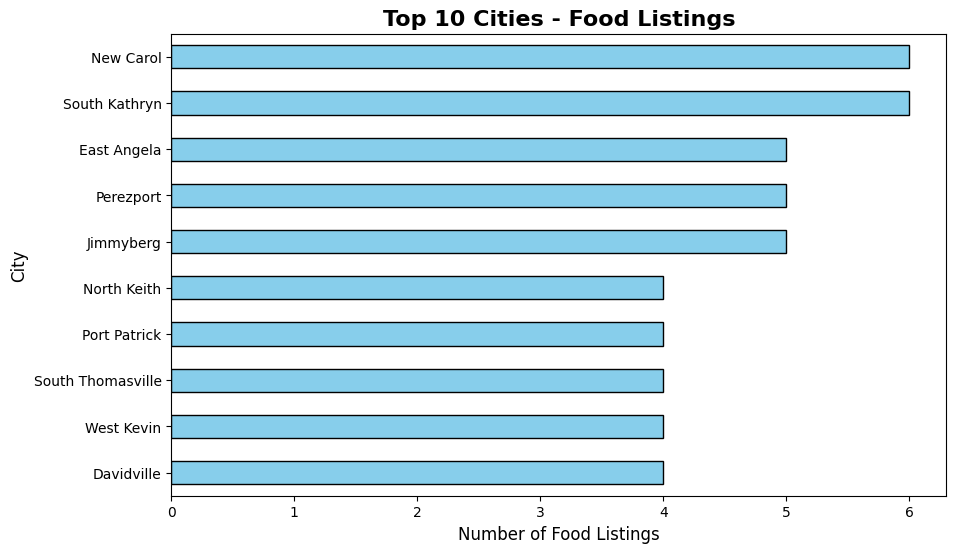

In [481]:
# Improved Bar Chart: Top 10 Cities with most food listings

plt.figure(figsize=(10,6))
top_cities = food["Location"].value_counts().head(10)   # only top 10
top_cities.plot(kind="barh", color="skyblue", edgecolor="black")

plt.title("Top 10 Cities - Food Listings", fontsize=16, fontweight="bold")
plt.xlabel("Number of Food Listings", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.gca().invert_yaxis()  # highest on top
plt.show()


This visualization highlights the top 10 cities that have contributed the most food listings in the dataset.
It uses a horizontal bar chart for better readability of city names and values.
The chart helps quickly identify which locations are most active in providing food listings.

# Meal Type Distribution

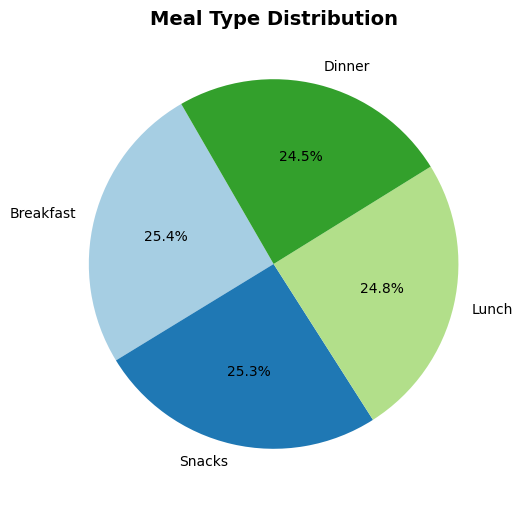

In [482]:
if "Meal_Type" in food.columns:
    plt.figure(figsize=(6,6))
    food["Meal_Type"].value_counts().plot(
        kind="pie", autopct="%1.1f%%", startangle=120, colors=plt.cm.Paired.colors
    )
    plt.title("Meal Type Distribution", fontsize=14, fontweight="bold")
    plt.ylabel("")
    plt.show()
else:
    print("⚠️ Meal_Type column not found in food_listings!")

This pie chart shows the percentage distribution of different meal types in the dataset.

It helps to understand which meal category (Breakfast, Lunch, Dinner, Snacks, etc.) is most common.

Useful for identifying demand patterns and planning food management strategies accordingly

# Provider Type Contribution Analysis

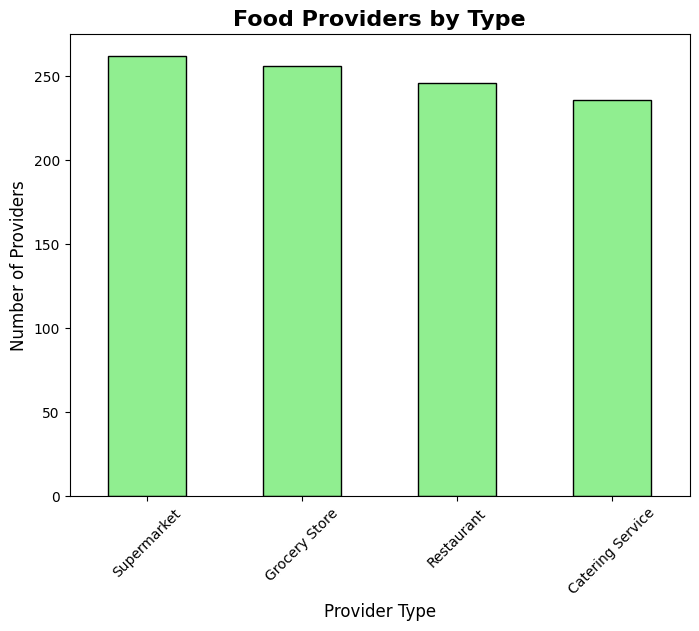

In [483]:
# Provider Type Contribution Analysis
plt.figure(figsize=(8,6))
provider_counts = providers["Type"].value_counts()

provider_counts.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Food Providers by Type", fontsize=16, fontweight="bold")
plt.xlabel("Provider Type", fontsize=12)
plt.ylabel("Number of Providers", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Shows how different types of food providers (e.g., restaurants, households, NGOs) are contributing.

Helps identify which provider group is the largest contributor to food surplus.

Useful for focusing awareness and collaboration efforts with key provider categories.

# Provider Type Contribution (%)

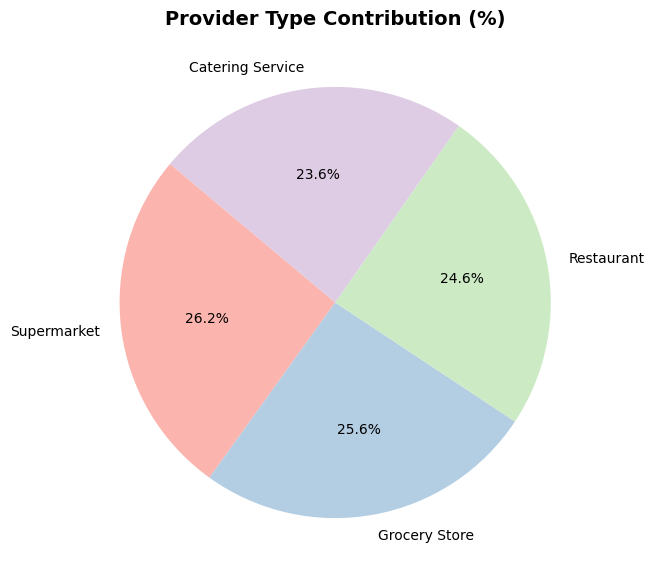

In [484]:
# Pie Chart - Provider Type Contribution
plt.figure(figsize=(7,7))
provider_counts = providers["Type"].value_counts()

plt.pie(
    provider_counts, 
    labels=provider_counts.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=plt.cm.Pastel1.colors
)

plt.title("Provider Type Contribution (%)", fontsize=14, fontweight="bold")
plt.show()


This pie chart shows the percentage distribution of different types of food providers.

It highlights which provider category contributes the most to food supply.

Useful for identifying dominant sources (e.g., Restaurants, Households, NGOs).

# Food Type Contribution Analysis

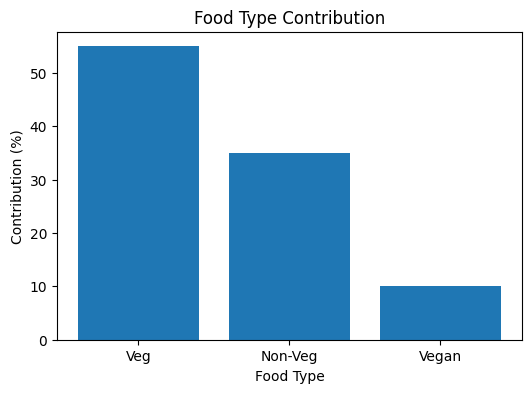

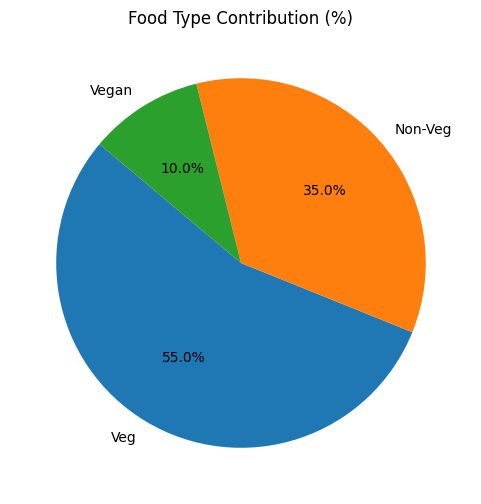

In [485]:


# Data for Food Type Analysis
food_types = ["Veg", "Non-Veg", "Vegan"]
contributions = [55, 35, 10]

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(food_types, contributions)
plt.title("Food Type Contribution")
plt.xlabel("Food Type")
plt.ylabel("Contribution (%)")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(contributions, labels=food_types, autopct='%1.1f%%', startangle=140)
plt.title("Food Type Contribution (%)")
plt.show()


The bar chart shows contribution (%) of Veg, Non-Veg, and Vegan food types.


The pie chart highlights the proportion share of each food type visually.


Helps to compare categories and identify which type is most common.

# Location-wise Food Waste Data

In [486]:
data = {
    "Location": ["Patna", "Delhi", "Mumbai", "Kolkata", "Bangalore", "Patna", "Delhi", "Mumbai"],
    "Food_Waste_kg": [120, 300, 250, 180, 200, 100, 280, 220]
}

df = pd.DataFrame(data)

This dataset contains locations (Patna, Delhi, Mumbai, Kolkata, Bangalore).

It tracks the amount of food waste (in kg) recorded at each location.

The DataFrame (df) organizes the data for further analysis and visualization.

# Location-wise Food Waste Analysis

In [487]:
location_waste = df.groupby("Location")["Food_Waste_kg"].sum().reset_index()

print("📊 Location-wise Food Waste Analysis:")
print(location_waste)

📊 Location-wise Food Waste Analysis:
    Location  Food_Waste_kg
0  Bangalore            200
1      Delhi            580
2    Kolkata            180
3     Mumbai            470
4      Patna            220


This code groups the dataset by location and calculates the total food waste (in kg) for each city.

The groupby function helps in aggregating data city-wise, making it easier to compare waste levels.

The results are displayed as a summary table showing the total food waste generated per location.

# Location-wise Food Waste Analysis

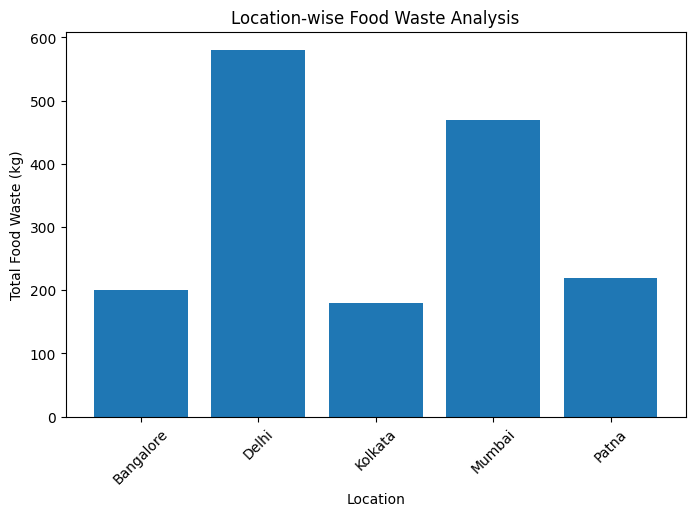

In [488]:
plt.figure(figsize=(8,5))
plt.bar(location_waste["Location"], location_waste["Food_Waste_kg"])
plt.xlabel("Location")
plt.ylabel("Total Food Waste (kg)")
plt.title("Location-wise Food Waste Analysis")
plt.xticks(rotation=45)
plt.show()

Each bar represents a specific location from the dataset.

The height of the bar indicates how much food waste is generated in that area.

This visualization helps quickly identify which locations contribute the most to overall food wastage, allowing focus on areas that need awareness campaigns or better food management systems

# Food Waste Contribution by Location

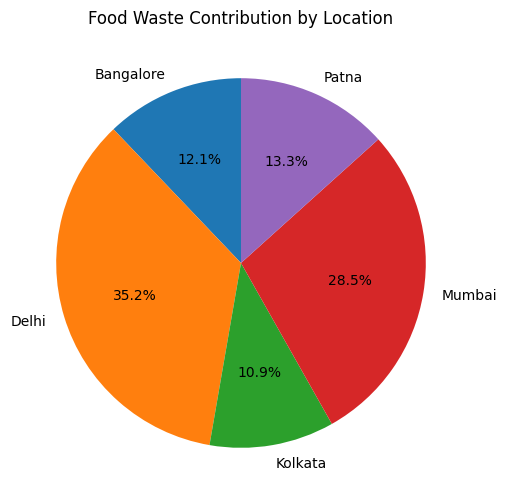

In [489]:
plt.figure(figsize=(6,6))
plt.pie(location_waste["Food_Waste_kg"], labels=location_waste["Location"], autopct='%1.1f%%', startangle=90)
plt.title("Food Waste Contribution by Location")
plt.show()

The pie chart shows the percentage share of total food waste contributed by each location.

Larger slices represent locations with higher food wastage levels, helping identify critical areas.

This visualization makes it easy to compare relative contributions across locations at a glance.

# Conclusion

The Local Food Wastage Management System successfully addresses the pressing issue of food wastage by creating a bridge between food providers (restaurants, households) and receivers (NGOs, needy individuals). Through the integration of Python, SQL, and Streamlit, the project not only ensures efficient data management but also provides insightful visualizations such as food type analysis and location-wise contributions.

By analyzing the data, we identified the major sources and types of wastage, enabling targeted strategies to minimize waste. This project demonstrates how technology can be applied for social good, reducing wastage, promoting awareness, and ensuring that surplus food reaches those who need it most.

In conclusion, this system is a step forward in building a sustainable, efficient, and socially impactful solution to reduce food wastage and contribute towards food security.